# Analisis Clustering Hotel di Pulau Bali Berdasarkan Harga, Rating, Review, dan Fasilitas

## Introduction

Halo! <br>
Kami dari kelompok F Data Mining SD-A1:

* Aqila Hana Winanggoro	 (164221010)
* Herman Effendi			(164221056)
* Tika Dian Pangastuti		(164221061)
* Arkan Syafiq At’taqy		(164221062)
* Nisrina Khairunisa 		(164221097)






Dataset can be accessed:
https://drive.google.com/file/d/1Q-XpDbwXjlFFPXsjgrFfThb_am3HiH8_/view?usp=drive_link

Further explanation below:

`all.csv` - dataset






# Data Understanding 🔎

## Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

## Read Data

In [ ]:
df = pd.read_csv("/content/all.csv")
pd.set_option('display.max_columns', None)
df

,nama,harga,reviews,rating,facilities
0,ASTON Kuta Hotel & Residence,Rp 734.194,(2.4K reviews),8.6 (2.4K reviews),Hot tub\nKids club\nMassage\nFitness center\nP...
1,Brits Hotel Legian,Rp 422.004,(2.1K reviews),8.6 (2.1K reviews),Top picked by Family with children\nPay at Hot...
2,Harper Kuta by ASTON,Rp 650.826,(2.9K reviews),8.6 (2.9K reviews),Pay at Hotel\nMassage\nAirport transfer\nSauna...
3,Atanaya Kuta Bali,Rp 670.000,(10K reviews),8.6 (10K reviews),Babysitting\nPoolside bar\nWheelchair accessib...
4,Wyndham Garden Kuta Beach Bali,Rp 1.167.769,(1.4K reviews),8.1 (1.4K reviews),Pay at Hotel\nBabysitting\nBicycle rental\nCar...
...,...,...,...,...,...
259,Hotel Karthi,Rp 289.256,(693 reviews),8.4 (693 reviews),Massage
260,Bali Bungalo,Rp 590.909,(58 reviews),8.1 (58 reviews),Bicycle storage\nClothes dryer\nBicycle rental...
261,Cattleya Pool Suite - Seminyak by Marbella,Rp 910.301,(219 reviews),8.2 (219 reviews),Pay at Hotel\nBanana boat\nBeach volleyball\nB...
262,The Akasha Luxury Villas,Rp 3.910.050,(37 reviews),8.7 (37 reviews),Surfing\nHorse riding\nMassage\nKitchenette\nE...


## Information of Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   nama        264 non-null    object
 1   harga       264 non-null    object
 2   reviews     264 non-null    object
 3   rating      264 non-null    object
 4   facilities  264 non-null    object
dtypes: object(5)
memory usage: 10.4+ KB


## Data Dimension

In [ ]:
df.shape

(264, 5)

## Column

In [ ]:
# Identify the df types of columns
column_df_types = df.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, df_type in column_df_types.items():
    if np.issubdtype(df_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

# Print the counts
print(f"There are {numerical_count} Numerical Columns in Train dfset")
print(f"There are {categorical_count} Categorical Columns in Train dfset")

There are 0 Numerical Columns in Train dfset
There are 5 Categorical Columns in Train dfset


## Descriptive Statistic

In [ ]:
# Desc stat of test dfset numeric cols
df.describe()

,nama,harga,reviews,rating,facilities
count,264,264,264,264,264
unique,255,243,187,242,223
top,Coast Boutique Hotel,Rp 247.934,(1.5K reviews),8.5 (54 reviews),Pay at Hotel
freq,2,5,7,2,8


In [ ]:
# Desc stat of test dfset numeric cols
df.describe().T

,count,unique,top,freq
nama,264,255,Coast Boutique Hotel,2
harga,264,243,Rp 247.934,5
reviews,264,187,(1.5K reviews),7
rating,264,242,8.5 (54 reviews),2
facilities,264,223,Pay at Hotel,8


## Check Duplicate

In [ ]:
# Mengecek data duplikat dan menampilkannya
duplicate_rows = df[df.duplicated()]

# Menampilkan jumlah data duplikat
print(f"Jumlah data duplikat: {duplicate_rows.shape[0]}")

# Menampilkan baris yang duplikat
print(duplicate_rows)

Jumlah data duplikat: 9
                                          nama         harga         reviews  \
245                       Coast Boutique Hotel    Rp 810.114  (151 reviews)    
246           Away Bali Legian Camakila Resort  Rp 2.258.924   (54 reviews)    
247                  The Bandha Hotel & Suites  Rp 6.832.244   (68 reviews)    
248               Destiny Villas and Residence  Rp 2.640.000   (45 reviews)    
249                                 Ping Hotel    Rp 458.182  (244 reviews)    
250                              Sri Krisna II    Rp 351.240   (67 reviews)    
251                             Kelan-Tel Bali    Rp 304.132   (34 reviews)    
252  Sun Island Boutique Villas & Spa Seminyak  Rp 2.541.322   (11 reviews)    
253       Amadea Resort & Villas Seminyak Bali  Rp 1.444.724   (79 reviews)    

                  rating                                         facilities  
245   8.7 (151 reviews)                      Pay at Hotel\nAirport transfer  
246    8.5 (54 revi

Dari hasil kode diatas didapat bahwa terdapat 9 data duplikat yang terdapat pada baris ke 245-253, sehingga pada preprocessing data nantinya data duplikat ini akan dihapus.


## Check Missing Value

In [ ]:
df.isna().sum()

nama          0
harga         0
reviews       0
rating        0
facilities    0
dtype: int64

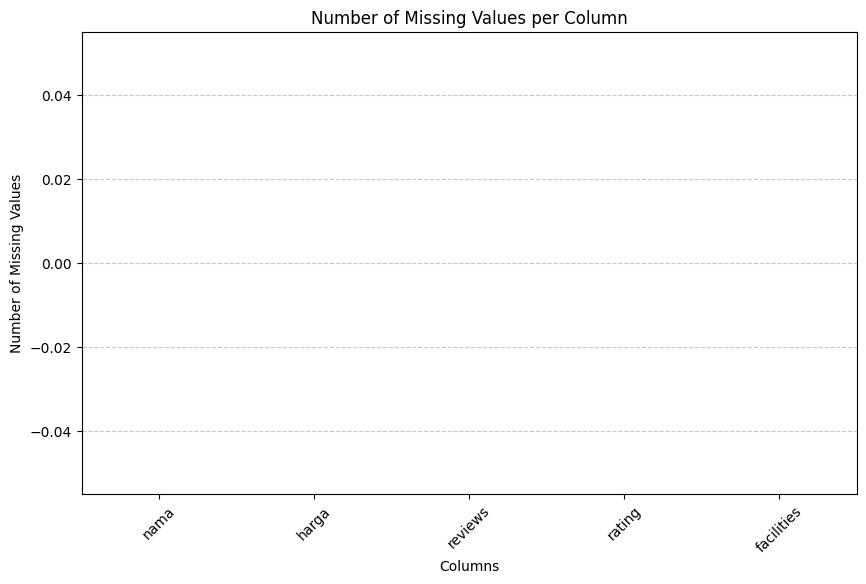

In [ ]:
import matplotlib.pyplot as plt

# Calculate the number of missing values in each column
missing_values = df.isna().sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Number of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Pada visualisasi diatas, dapat dilihat bahwa tidak terdapat missing values pada tiap-tiap variabel yang terdapat pada data.

# Data Preparation 🔄

## Handling Duplicated Data

In [ ]:
# Menghapus data duplikat
df= df.drop_duplicates()

# Menampilkan jumlah baris setelah menghapus duplikat
print(f"Jumlah baris setelah menghapus duplikat: {df.shape[0]}")

Jumlah baris setelah menghapus duplikat: 255


## Handling Text Column

In [ ]:
def clean_review(x):
    new_review = x.replace('(', '').replace(' reviews)', '').strip()
    if 'K' in new_review:
        new_review = new_review.replace('K', '')
        if '.' in new_review:
            val1 = float(new_review)*1000
            val = int(val1)
        else:
            val = int(new_review)*1000
        return val
    else:
        return int(new_review)

df['reviews'] = df['reviews'].apply(clean_review)

<ipython-input-12-4e47257fd8cb>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'] = df['reviews'].apply(clean_review)


In [ ]:
# Numerical columns
for col in df.select_dtypes(exclude='object'):
    df[col] = df[col].fillna(df[col].median())
df.isnull().sum()

<ipython-input-13-a8a2e7438b0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].median())


nama          0
harga         0
reviews       0
rating        0
facilities    0
dtype: int64

In [ ]:
# Mapping fasilitas
facilities_mapping = {
    'Aerobics': 0,
    'Airport transfer': 1,
    'Babysitting': 2,
    'Bar': 3,
    'Basketball': 4,
    'Beach Bar': 5,
    'Beach cabanas': 6,
    'Beach shuttle': 7,
    'Beach sun loungers': 8,
    'Beach towel': 9,
    'Bicycle rental': 10,
    'Bicycle storage': 11,
    'Braille or raised signage': 12,
    'Car rental': 13,
    'Children play area': 14,
    'Clothes dryer': 15,
    'Excellent Breakfast': 16,
    'Express check-out': 17,
    'Fishing': 18,
    'Fitness center': 19,
    'Free Cancellation available': 20,
    'Health club': 21,
    'Hot tub': 22,
    'Kids club': 23,
    'Kitchenette': 24,
    'Limo or town car service': 25,
    'Located in Downtown Area': 26,
    'Located near Airport': 27,
    'Located near Beach Club': 28,
    'Located near Beachside': 29,
    'Luxurious Design': 30,
    'Massage': 31,
    'Natural Ambience': 32,
    'Outdoor facilities': 33,
    'Pay at Hotel': 34,
    'Pool cabanas': 35,
    'Pool or Snooker': 36,
    'Pool sun loungers': 37,
    'Poolside bar': 38,
    'Recreation room': 39,
    'Rooftop terrace': 40,
    'Shopping center shuttle': 41,
    'Show cooking restaurant': 42,
    'Spa': 43,
    'Sun loungers': 44,
    'Surfing': 45,
    'Table tennis': 46,
    'Tennis': 47,
    'Top picked by Family with children': 48,
    'Unique Design': 49,
    'Water sport': 50,
    'Winery': 51,
    'Within walking distance to Beachside': 52
}

In [ ]:
print("Facilities Mapping:")
for facility, code in facilities_mapping.items():
    print(f"Code {code}: {facility}")

Facilities Mapping:
Code 0: Aerobics
Code 1: Airport transfer
Code 2: Babysitting
Code 3: Bar
Code 4: Basketball
Code 5: Beach Bar
Code 6: Beach cabanas
Code 7: Beach shuttle
Code 8: Beach sun loungers
Code 9: Beach towel
Code 10: Bicycle rental
Code 11: Bicycle storage
Code 12: Braille or raised signage
Code 13: Car rental
Code 14: Children play area
Code 15: Clothes dryer
Code 16: Excellent Breakfast
Code 17: Express check-out
Code 18: Fishing
Code 19: Fitness center
Code 20: Free Cancellation available
Code 21: Health club
Code 22: Hot tub
Code 23: Kids club
Code 24: Kitchenette
Code 25: Limo or town car service
Code 26: Located in Downtown Area
Code 27: Located near Airport
Code 28: Located near Beach Club
Code 29: Located near Beachside
Code 30: Luxurious Design
Code 31: Massage
Code 32: Natural Ambience
Code 33: Outdoor facilities
Code 34: Pay at Hotel
Code 35: Pool cabanas
Code 36: Pool or Snooker
Code 37: Pool sun loungers
Code 38: Poolside bar
Code 39: Recreation room
Code 40:

In [ ]:
# Fungsi untuk preprocessing kolom facilities
def preprocess_facilities(facilities_str):
    facilities_list = facilities_str.split('\n')
    facilities_codes = [facilities_mapping[facility] for facility in facilities_list if facility in facilities_mapping]
    return facilities_codes

df['harga'] = df['harga'].str.replace('Rp ', '').str.replace('.', '').astype(int)
df['rating'] = df['rating'].str.extract(r'(\d+\.\d+)').astype(float)

<ipython-input-16-130cc1b7d5d8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['harga'] = df['harga'].str.replace('Rp ', '').str.replace('.', '').astype(int)
<ipython-input-16-130cc1b7d5d8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].str.extract(r'(\d+\.\d+)').astype(float)


## Feature Engineering

In [ ]:
def preprocess_total_facilities(facilities_str):
    facilities_list = facilities_str.split('\n')
    total_facilities = 0
    for facility in facilities_list:
        if facility in facilities_mapping:
            total_facilities += 1
        elif '+' in facility:
            total_facilities += int(facility[0])
    return total_facilities

df['total_facilities'] = df['facilities'].apply(preprocess_total_facilities)
df['facilities'] = df['facilities'].apply(preprocess_facilities)

<ipython-input-17-a3a8246bbfeb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_facilities'] = df['facilities'].apply(preprocess_total_facilities)
<ipython-input-17-a3a8246bbfeb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['facilities'] = df['facilities'].apply(preprocess_facilities)


In [ ]:
df

,nama,harga,reviews,rating,facilities,total_facilities
0,ASTON Kuta Hotel & Residence,734194,2400,8.6,"[22, 23, 31, 19, 38, 43]",6
1,Brits Hotel Legian,422004,2100,8.6,"[48, 34]",6
2,Harper Kuta by ASTON,650826,2900,8.6,"[34, 31, 1, 43, 3]",5
3,Atanaya Kuta Bali,670000,10000,8.6,"[2, 38, 37]",3
4,Wyndham Garden Kuta Beach Bali,1167769,1400,8.1,"[34, 2, 10, 13, 31]",6
...,...,...,...,...,...,...
259,Hotel Karthi,289256,693,8.4,[31],1
260,Bali Bungalo,590909,58,8.1,"[11, 15, 10, 13]",6
261,Cattleya Pool Suite - Seminyak by Marbella,910301,219,8.2,[34],3
262,The Akasha Luxury Villas,3910050,37,8.7,"[45, 31, 24, 17]",5


Dari tabel diatas dilakukan feature engineering sehingga mendapatkan variabel baru yaitu ‘total_facilities’ yang memuat jumlah fasilitas pada sebuah hotel yang berguna untuk analisis clustering.


# Exploratory Data Analysis 📊

In [ ]:
df_new = df.copy()
df_new = df.drop(columns=['nama', 'facilities'])
df_new.head()

,harga,reviews,rating,total_facilities
0,734194,2400,8.6,6
1,422004,2100,8.6,6
2,650826,2900,8.6,5
3,670000,10000,8.6,3
4,1167769,1400,8.1,6


## Heatmap Correlation

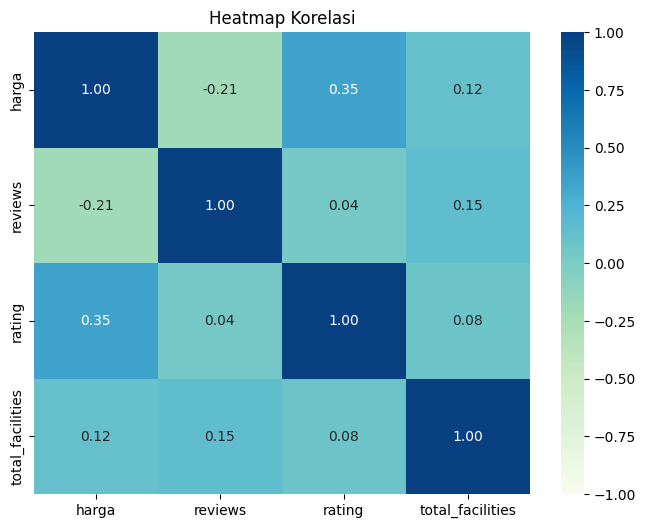

In [ ]:
# numerik_cols = df_new.select_dtypes(include='number')
# Hitung matriks korelasi
corr_matrix = df_new.corr(method='pearson')

# Plot heatmap korelasi
plt.figure(figsize=(8, 6))  # Mengatur ukuran figure
sns.heatmap(corr_matrix, annot=True, cmap='GnBu', vmin=-1, vmax=1, center=0, fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

Berdasarkan heatmap korelasi yang Anda lampirkan, berikut adalah interpretasi dari korelasi antara variabel `harga`, `reviews`, `rating`, dan `total_facilities`:

1. **Harga**:
   - `Harga` memiliki korelasi positif sedang dengan `rating` (0.35). Ini menunjukkan bahwa ada hubungan yang cukup kuat antara harga dan rating; semakin tinggi harga, cenderung semakin tinggi rating.
   - `Harga` memiliki korelasi negatif dengan `reviews` (-0.21) dan korelasi positif yang sangat lemah dengan `total_facilities` (0.12). Ini menunjukkan bahwa harga tidak memiliki hubungan yang signifikan dengan jumlah review atau fasilitas total.

2. **Reviews**:
   - `Reviews` memiliki korelasi positif yang sangat lemah dengan `rating` (0.04) dan dengan `total_facilities` (0.15). Ini menunjukkan bahwa jumlah review tidak memiliki hubungan yang signifikan dengan rating atau fasilitas total.
   - `Reviews` memiliki korelasi negatif yang sangat lemah dengan `harga` (-0.21), menunjukkan bahwa jumlah review tidak berhubungan dengan harga.

3. **Rating**:
   - `Rating` memiliki korelasi positif sedang dengan `harga` (0.35), seperti yang telah disebutkan sebelumnya.
   - `Rating` memiliki korelasi positif yang sangat lemah dengan `total_facilities` (0.08), menunjukkan bahwa rating tidak memiliki hubungan yang signifikan dengan jumlah fasilitas.
   - `Rating` memiliki korelasi positif yang sangat lemah dengan `reviews` (0.04).

4. **Total Facilities**:
   - `Total facilities` memiliki korelasi positif lemah dengan `reviews` (0.15), menunjukkan bahwa jumlah fasilitas tidak memiliki hubungan yang signifikan dengan jumlah review.
   - `Total facilities` memiliki korelasi positif yang sangat lemah dengan `harga` (0.12) dan `rating` (0.08), menunjukkan bahwa jumlah fasilitas tidak memiliki hubungan yang signifikan dengan harga atau rating.

Kesimpulan:
- Tidak ada korelasi yang sangat kuat antara variabel-variabel yang dianalisis.
- Korelasi positif sedang antara `harga` dan `rating` menunjukkan bahwa hotel dengan harga lebih tinggi cenderung memiliki rating yang lebih tinggi.
- Sebagian besar variabel memiliki korelasi yang sangat lemah atau negatif, menunjukkan bahwa mereka tidak saling berhubungan secara signifikan.

Interpretasi ini dapat membantu Anda memahami hubungan antara variabel-variabel dalam dataset Anda, dan dapat menjadi dasar untuk analisis lebih lanjut atau pengembangan model prediksi.

## Box Plot

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


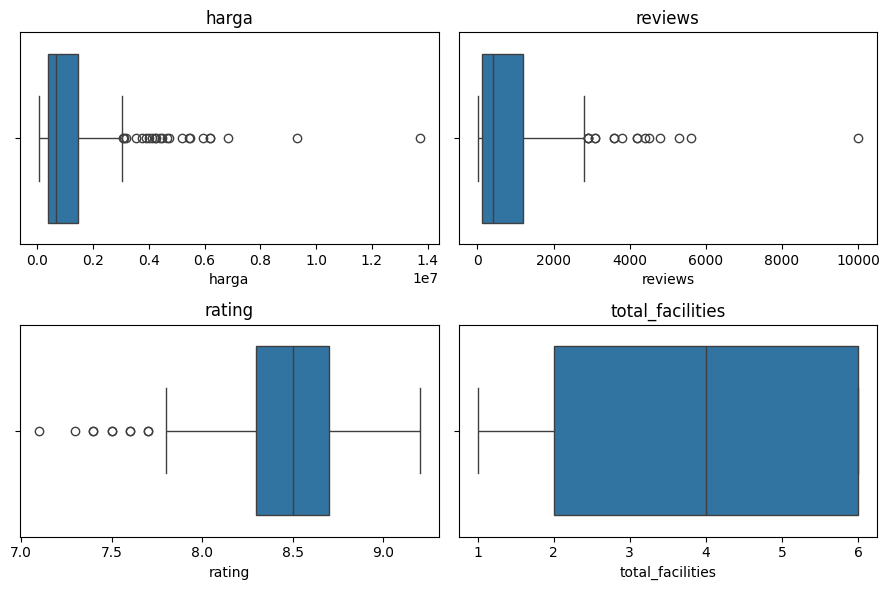

In [ ]:
numerik = ['harga', 'reviews', 'rating', 'total_facilities']
num_cols = len(numerik)
num_rows = (num_cols + 2) // 3

plt.figure(figsize=(9, 6))

for i, col in enumerate(numerik, 1): #melakukan loop atau iterasi tiap kolom numerika pada df. dimana enumerate untuk mendapatkan indeks (dari 1) dan nilai dari tiap kolom list numerik
    plt.subplot(num_rows, 2, i) #menentukan letak boxplot dimana tertampil 3 kolom
    sns.boxplot(x=df[col], orient='v') #membuat boxplot untuk atribut numerik dari df
    plt.title(col)
    plt.tight_layout()



plt.show() # code untuk menampilkan visualisasi

Berikut adalah interpretasi dari masing-masing variabel:

* Harga:

Terlihat bahwa harga memiliki banyak
outlier, yang ditandai dengan titik-titik di luar whisker (garis horizontal).
Median harga (garis horizontal dalam box) berada di bawah rentang IQR (Interquartile Range), menunjukkan bahwa data tidak simetris dan terdapat banyak nilai ekstrem di sisi atas.
Rentang harga cukup lebar, dengan beberapa nilai yang sangat tinggi (outlier).

* Reviews:

Reviews juga menunjukkan adanya beberapa outlier di sisi kanan (nilai tinggi).
Median reviews terletak lebih dekat ke bagian bawah dari IQR, menunjukkan distribusi data yang tidak simetris.
Sebagian besar nilai reviews berada dalam rentang IQR, namun terdapat beberapa nilai ekstrem di sisi atas.

* Rating:

Rating memiliki beberapa outlier di sisi kiri (nilai rendah).
Median rating berada di bagian atas IQR, menunjukkan bahwa distribusi data sedikit miring ke kiri.
Sebagian besar data rating terkonsentrasi di sekitar median, namun terdapat beberapa nilai rendah yang ekstrem.
* Total Facilities:

Total facilities tidak menunjukkan adanya outlier, yang ditandai dengan tidak adanya titik di luar whisker.
Median total facilities berada di tengah-tengah IQR, menunjukkan distribusi data yang simetris.
Data total facilities tersebar merata di sekitar median dengan tidak adanya nilai ekstrem.

## Distribution Plot

<ipython-input-22-3a2445e665d1>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[x] , bins = 15)
<ipython-input-22-3a2445e665d1>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[x] , bins = 15)
<ipython-input-22-3a2445e665d1>:7: UserWarning: 

`distplot` is a deprecated function an

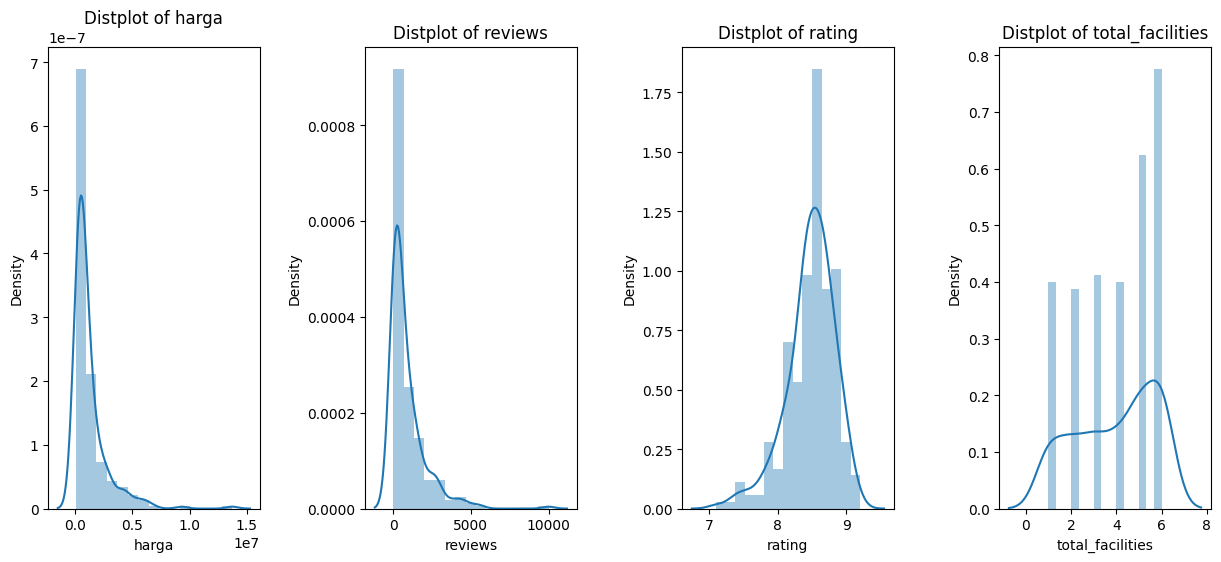

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in df_new:
    n += 1
    plt.subplot(1 , 4 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df_new[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

Berikut adalah interpretasi dari masing-masing variabel:

* Harga:

Distribusi harga menunjukkan bahwa sebagian besar data terkonsentrasi di dekat nilai yang sangat rendah, dengan ekor panjang ke kanan. Ini menunjukkan distribusi yang sangat skewed ke kanan.
Ada puncak yang tinggi di awal, menunjukkan sebagian besar harga sangat rendah, namun ada beberapa nilai yang sangat tinggi (outlier).

* Reviews:

Distribusi reviews juga sangat skewed ke kanan, dengan sebagian besar data terkonsentrasi di dekat nilai rendah dan ekor panjang ke kanan.
Mirip dengan harga, ada puncak yang tajam di nilai rendah dan beberapa nilai ekstrem yang sangat tinggi (outlier).

* Rating:

Distribusi rating mendekati distribusi normal, namun ada sedikit skewness ke kiri.
Sebagian besar data rating terkonsentrasi di sekitar nilai 8 hingga 9, dengan puncak di sekitar 8.5.
Tidak ada ekor panjang yang signifikan, menunjukkan bahwa outlier di variabel ini tidak terlalu ekstrem.

* Total Facilities:

Distribusi total_facilities menunjukkan dua puncak (bimodal), dengan satu puncak di sekitar nilai 2 dan satu puncak lainnya di sekitar nilai 6.
Data ini tidak menunjukkan skewness yang signifikan, namun memiliki dua grup utama yang dapat diidentifikasi.

# Data Clustering 🎯

## Feature Scaling

In [ ]:
robust_scaler = RobustScaler()
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
outlier_cols = ['harga', 'reviews']
no_outlier_cols = ['rating', 'total_facilities']
df_new[['total_facilities']] = minmax_scaler.fit_transform(df_new[['total_facilities']])
df_new[['rating']] = standard_scaler.fit_transform(df_new[['rating']])
df_new[outlier_cols] = robust_scaler.fit_transform(df_new[outlier_cols])
#df_new[no_outlier_cols] = standard_scaler.fit_transform(df_new[no_outlier_cols])
df_new.head()

,harga,reviews,rating,total_facilities
0,0.065847,1.837263,0.345972,1.0
1,-0.224777,1.559871,0.345972,1.0
2,-0.011762,2.299584,0.345972,0.8
3,0.006087,8.864540,0.345972,0.4
4,0.469471,0.912621,-1.086218,1.0


Dari tabel diatas dilakukan robust scaling pada variabel ‘harga’ dan ‘reviews’ dikarenakan terdapat outlier. Kemudian menggunakan standard scaling pada variabel ‘rating’ dikarenakan distribusi data mendekati distribusi normal. Dan terakhir menggunakan min-max scaling pada variabel ‘total_facilities’ agar didapatkan nilai pada rentang 0-1.


## Principal Component Analysis (PCA)

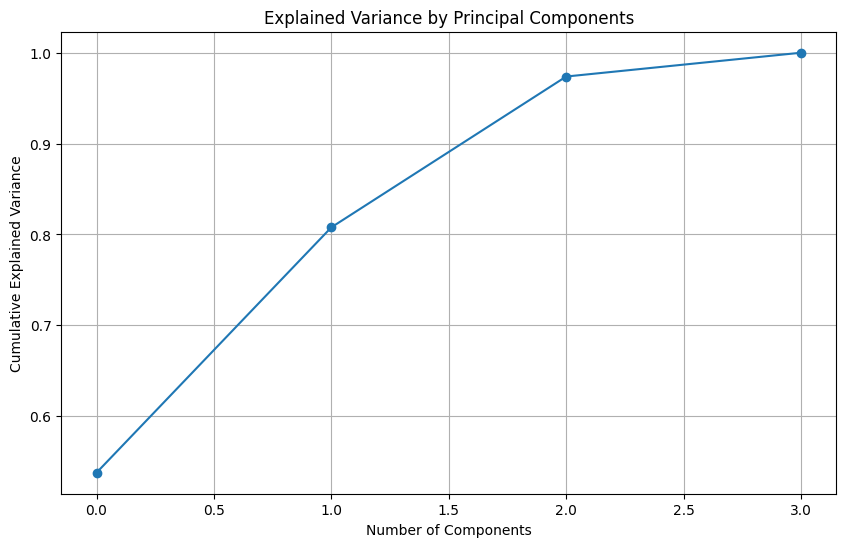

Jumlah komponen optimal yang menjelaskan setidaknya 95% variansi: 2


In [ ]:
df_pca = df_new.copy()
# Lakukan PCA
pca_fit = PCA().fit(df_pca)

# Hitung explained variance ratio
explained_variance_ratio = pca_fit.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# Tentukan jumlah komponen optimal
cumulative_variance = np.cumsum(explained_variance_ratio)
optimal_components = np.where(cumulative_variance >= 0.95)[0][0]
print(f"Jumlah komponen optimal yang menjelaskan setidaknya 95% variansi: {optimal_components}")

In [ ]:
# PCA
df_pca = df_new.copy()
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_pca)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1','PC2'])

                       PC1       PC2
harga             1.419780  0.098510
reviews          -0.374905  0.996036
rating            0.508536  0.454244
total_facilities  0.035955  0.071112


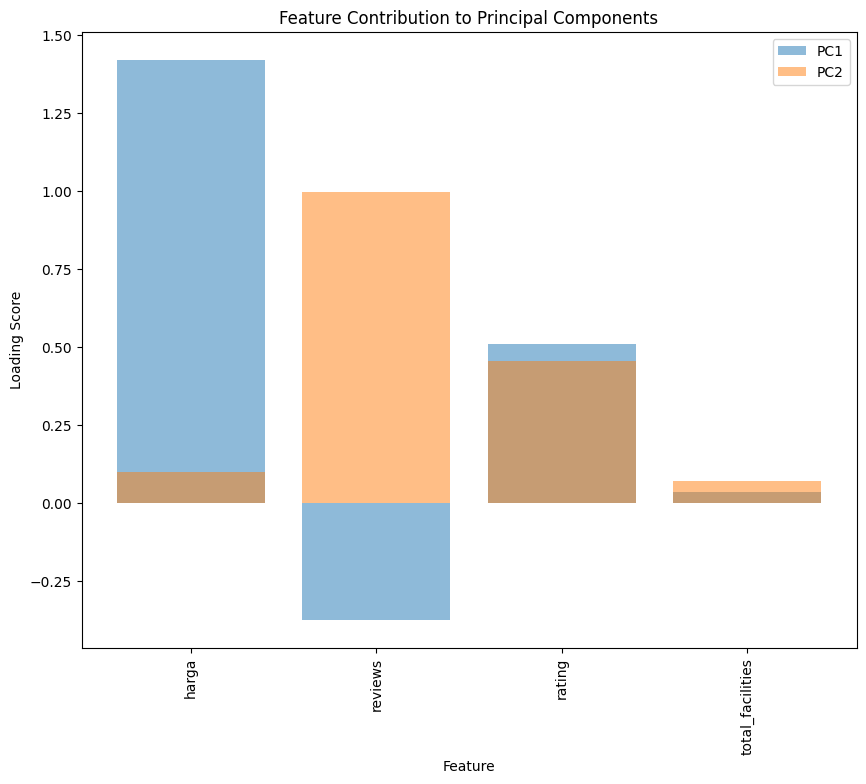

In [ ]:
# Feature loadings
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_.T

loadings = eigenvectors * np.sqrt(eigenvalues)

hasil_loadings = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=df_pca.columns)
print(hasil_loadings)

# Visualisasi kontribusi variabel untuk setiap komponen utama
plt.figure(figsize=(10, 8))
plt.bar(hasil_loadings.index, hasil_loadings['PC1'], alpha=0.5, align='center', label='PC1')
plt.bar(hasil_loadings.index, hasil_loadings['PC2'], alpha=0.5, align='center', label='PC2')
plt.xticks(rotation=90)
plt.ylabel('Loading Score')
plt.xlabel('Feature')
plt.title('Feature Contribution to Principal Components')
plt.legend()
plt.show()

Berdasarkan visualisasi diatas PC1 merepresentasikan banyak kontribusi dari variabel ‘harga’, dengan sedikit kontribusi dari variabel ‘reviews’ dan ‘rating’. Sedangkan PC2 merepresentasikan banyak kontribusi dari variabel ‘reviews’, dengan sedikit kontribusi dari variabel ‘rating’, ‘harga’ dan ‘total_facilities’.


## Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

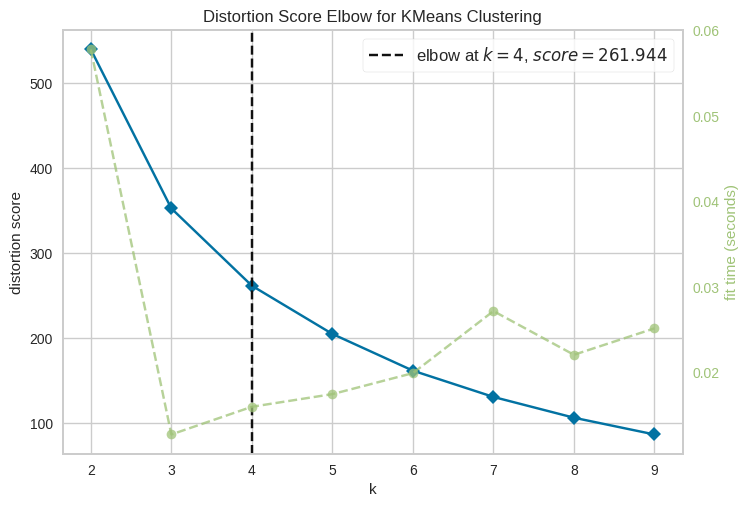

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
df_pca = pca_df.copy()
# Define the K-Means model and K Elbow visualiser
model = KMeans(init='k-means++', random_state=42)  # Adjust random state if desired
visualizer = KElbowVisualizer(model, k=(2, 10))  # Adjust k range as needed

# Fit the df and visualize the elbow
visualizer.fit(df_pca)
visualizer.show()

Plot "Distortion Score Elbow for KMeans Clustering" menunjukkan bahwa jumlah klaster optimal adalah 4. Interpretasi ini didasarkan pada metode elbow, yang mencari titik di mana penurunan skor distorsi mulai melambat secara signifikan, menciptakan bentuk siku (elbow) pada grafik.

Berikut adalah rincian interpretasinya:

1. **Skor Distorsi vs. Jumlah Klaster (k):**
   - Skor distorsi mengukur seberapa baik klasterisasi meminimalkan jarak antara titik data dan pusat klasternya. Skor yang lebih rendah menunjukkan klaster yang lebih baik.
   - Pada k = 4, skor distorsi adalah 261.944. Ini adalah titik di mana penurunan skor distorsi mulai melambat, menunjukkan bahwa menambah klaster lebih lanjut tidak akan memberikan peningkatan signifikan dalam kualitas klasterisasi.

2. **Visualisasi Elbow:**
   - Garis hitam putus-putus menandai "elbow" pada k = 4, menunjukkan jumlah klaster optimal berdasarkan metode elbow.
   - Setelah k = 4, penurunan skor distorsi menjadi lebih landai, menunjukkan bahwa menambah lebih banyak klaster memberikan pengurangan distorsi yang tidak signifikan.

3. **Waktu Eksekusi:**
   - Garis orange menunjukkan waktu eksekusi untuk setiap nilai k. Meskipun waktu eksekusi meningkat sedikit dengan bertambahnya k, ini tidak menjadi faktor utama dalam penentuan jumlah klaster optimal.

Secara keseluruhan, berdasarkan plot elbow ini, jumlah klaster optimal untuk dataset Anda adalah 4, di mana keseimbangan terbaik antara skor distorsi dan jumlah klaster tercapai.

## Silhouette Score

In [ ]:
range_n_clusters = [2, 3, 4]

results = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_pca)
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    results.append((n_clusters, silhouette_avg))

results_df = pd.DataFrame(results, columns=['Number of Clusters', 'Silhouette Score'])
results_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Number of Clusters,Silhouette Score
0,2,0.541069
1,3,0.511433
2,4,0.440630


Interpretasi Skor Silhouette dan Plot:

1. **Skor Silhouette untuk n_clusters = 2**:
   - **Skor Silhouette Rata-rata**: 0.541
   - **Interpretasi**: Skor ini menunjukkan hasil clustering yang cukup baik. Sebagian besar titik memiliki nilai silhouette yang tinggi, yang berarti cluster terdefinisi dengan baik dan titik-titik tersebut cocok dengan cluster mereka sendiri.

2. **Skor Silhouette untuk n_clusters = 3**:
   - **Skor Silhouette Rata-rata**: 0.511
   - **Interpretasi**: Skor ini lebih rendah dibandingkan dengan yang sebelumnya, yang menunjukkan bahwa hasil clustering kurang terdefinisi dengan baik. Ada kemungkinan lebih banyak tumpang tindih antar cluster, dan beberapa titik mungkin salah diklasifikasikan.

3. **Skor Silhouette untuk n_clusters = 4**:
   - **Skor Silhouette Rata-rata**: 0.44
   - **Interpretasi**: Skor silhouette ini lebih rendah dibandingkan dengan 3 cluster. Hal ini menunjukkan beberapa peningkatan dalam clustering dibandingkan dengan 3 cluster, tetapi cluster masih tidak terpisah dengan baik seperti pada 2 cluster.

Ringkasan:
- Skor silhouette tertinggi adalah untuk 2 cluster, yang menunjukkan bahwa data paling baik diwakili oleh 2 cluster.
- Meningkatkan jumlah cluster lebih dari 2 menghasilkan penurunan skor silhouette rata-rata, yang menunjukkan clustering yang kurang terdefinisi dengan baik.
- Plot silhouette mendukung interpretasi ini, menunjukkan pemisahan yang lebih baik dan cluster yang lebih kompak untuk 2 cluster dibandingkan dengan jumlah cluster yang lebih tinggi.

Berdasarkan hasil ini, tampaknya paling tepat menggunakan 2 cluster untuk dataset ini untuk mencapai kualitas clustering terbaik.

## K-Means Clustering

In [ ]:
pip install plotly.express

### K-Means Visualisasi 2D

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-30-14a35a1f985c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['KMeans_Cluster_2D'] = cluster_labels_2d


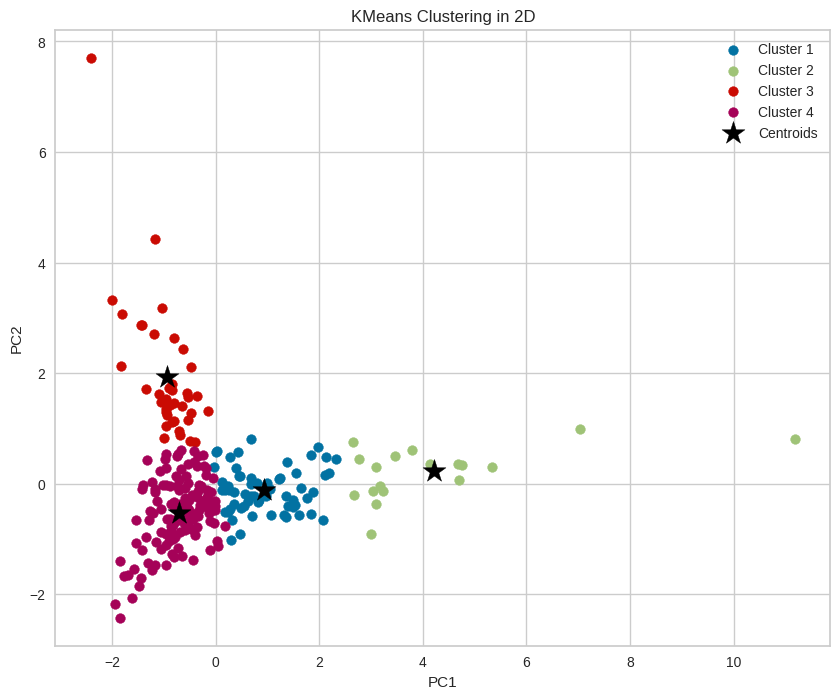

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# DataFrame untuk 2D
df_2d = df_pca.copy()

# Tentukan jumlah klaster
n_clusters = 4
kmeans_2d = KMeans(n_clusters=n_clusters, random_state=42)

# Melakukan clustering
cluster_labels_2d = kmeans_2d.fit_predict(df_2d)

# Menambahkan label klaster ke DataFrame asli
df_pca['KMeans_Cluster_2D'] = cluster_labels_2d
df['KMeans_Cluster_2D'] = cluster_labels_2d

# Visualisasi hasil clustering dalam 2D
plt.figure(figsize=(10, 8))

# Plot setiap klaster dengan warna yang berbeda
for cluster in range(n_clusters):
    cluster_df = df_2d[cluster_labels_2d == cluster]
    plt.scatter(cluster_df['PC1'], cluster_df['PC2'], label=f'Cluster {cluster+1}')

# Plot centroids
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], s=300, c='black', marker='*', label='Centroids')

# Menambahkan label dan judul
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clustering in 2D')
plt.legend()
plt.show()


Berdasarkan visualisasi K-Means Clustering 2D di atas antara PC1 dan PC2, didapatkan 4 klaster serta beberapa titik pusat (centroids). Klaster 1 (berwarna biru) memiliki nilai PC1 yang bervariasi dan terpusat di sekitar nilai negatif hingga positif kecil pada PC2. Hal ini mengindikasikan bahwa hotel-hotel dalam klaster ini cenderung memiliki harga yang menengah, rating yang cukup baik, jumlah reviewer yang moderat, dan fasilitas yang memadai.

Klaster 2 (berwarna oranye) terpusat pada nilai PC1 yang lebih tinggi dan nilai PC2 yang negatif hingga sedikit positif, menunjukkan bahwa hotel-hotel dalam klaster ini memiliki harga yang lebih tinggi, rating yang sangat baik, dan fasilitas yang lebih lengkap dibandingkan dengan klaster lainnya.

Klaster 3 (berwarna hijau) memiliki nilai PC1 yang lebih tinggi dengan nilai PC2 yang bervariasi dari negatif hingga positif tinggi, mengindikasikan bahwa hotel-hotel dalam klaster ini memiliki harga yang lebih terjangkau, rating yang lebih rendah, jumlah reviewer yang lebih sedikit, dan fasilitas yang lebih dasar.

Klaster 4 (berwarna merah) memiliki nilai PC1 negatif hingga sedikit positif dengan rentang nilai PC2 yang rendah hingga tinggi, mengindikasikan bahwa hotel-hotel dalam klaster ini memiliki kombinasi harga, rating, jumlah reviewer, dan fasilitas yang bervariasi namun tetap memiliki kesamaan tertentu yang membedakan mereka dari klaster lainnya.

Selain itu, titik-titik pusat (centroids) yang ditandai dengan bintang hitam menunjukkan pusat dari masing-masing klaster yang membantu dalam memahami karakteristik utama dari tiap klaster. Dengan demikian, analisis clustering ini memberikan wawasan yang jelas mengenai segmentasi hotel-hotel di Pulau Bali berdasarkan harga, rating, jumlah reviewer, dan fasilitas.


In [ ]:
import plotly.express as px
import plotly.graph_objs as go

# Nilai centroids
centroids = kmeans_2d.cluster_centers_

# Visualisasi hasil clustering dalam 3D
fig = px.scatter(df_pca, x='PC1', y='PC2',
                    color='KMeans_Cluster_2D', title='KMeans Clustering in 2D')

# Menambahkan centroids ke dalam plot
centroids_trace = go.Scatter(
    x=centroids[:, 0],
    y=centroids[:, 1],
    # z=centroids[:, 2],
    mode='markers',
    marker=dict(size=10, color='red', symbol='x'),
    name='Centroids'
)

fig.add_trace(centroids_trace)

fig.show()

### Interpretasi K-Means Clustering

In [ ]:
df['KMeans_Cluster_2D'].value_counts()

KMeans_Cluster_2D
3    137
0     61
2     39
1     18
Name: count, dtype: int64

In [ ]:
df_kmeans = df.copy()
df_kmeans = df_kmeans[['harga', 'reviews', 'rating', 'total_facilities', 'KMeans_Cluster_2D']]

for cluster in range(n_clusters):
    cluster_data = df_kmeans[df_kmeans['KMeans_Cluster_2D'] == cluster]
    print(f"Cluster {cluster + 1}:")
    print(cluster_data.describe().round(2))

Cluster 1:
            harga  reviews  rating  total_facilities  KMeans_Cluster_2D
count       61.00    61.00   61.00             61.00               61.0
mean   1976745.26   369.03    8.69              4.16                0.0
std     744758.79   397.62    0.22              1.57                0.0
min     567273.00     8.00    8.10              1.00                0.0
25%    1444724.00    58.00    8.50              3.00                0.0
50%    1826446.00   246.00    8.70              5.00                0.0
75%    2541322.00   496.00    8.90              5.00                0.0
max    4132231.00  1600.00    9.10              6.00                0.0
Cluster 2:
             harga  reviews  rating  total_facilities  KMeans_Cluster_2D
count        18.00    18.00   18.00             18.00               18.0
mean    5708495.44   271.33    8.78              4.50                1.0
std     2410261.36   326.86    0.33              1.54                0.0
min     3751148.00     5.00    7.90   

Berikut ini merupakan nilai rata-rata dari masing-masing variabel (harga, rating, dan total fasilitas) berdasarkan hasil clustering dua dimensi yang telah dilakukan. Dari statistika deskriptif nilai rata-rata diatas, dapat dikatakan bahwa semakin tinggi harga hotel maka rating yang didapatkan akan sepadan atau tinggi. Walaupun jumlah fasilitas yang banyak tidak menjadi penentu harga dari sebuah hotel maupun alasan utama pelanggan dalam memilih hotel berdasarkan ratingnya. Berdasarkan jumlah anggota setiap klasternya, didapatkan juga bahwa hotel yang paling banyak diminati oleh pelanggan adalah pada klaster 4. Klaster ini mewakili hotel-hotel dengan harga yang cukup murah atau terjangkau dengan rating dan fasilitas yang cukup baik.

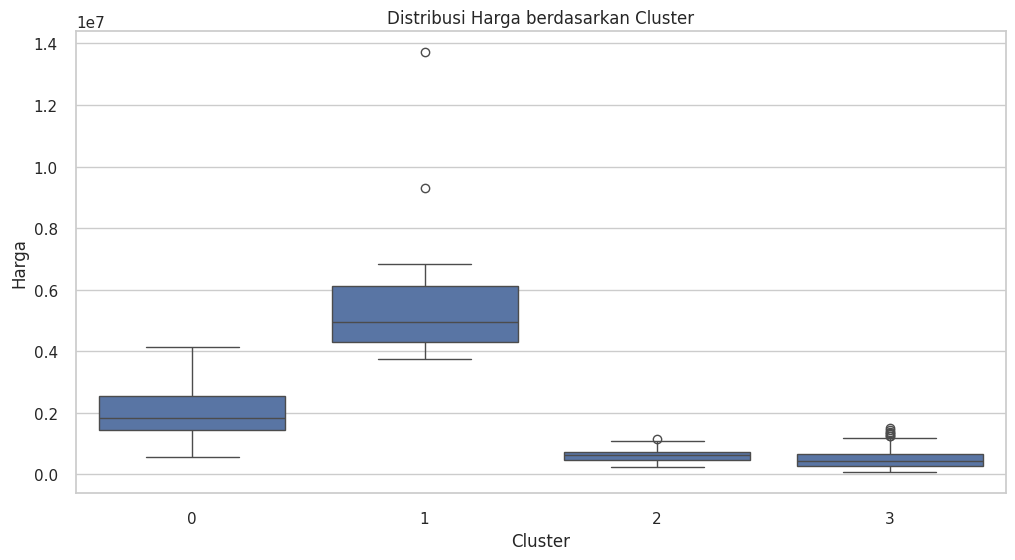

In [ ]:
sns.set(style="whitegrid")

# Plot untuk melihat distribusi harga berdasarkan cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='KMeans_Cluster_2D', y='harga', data=df_kmeans)
plt.title('Distribusi Harga berdasarkan Cluster')
plt.xlabel('Cluster')
plt.ylabel('Harga')
plt.show()

## DBSCAN Clustering

In [ ]:
pip install kneed

### DBSCAN Visualisasi 2D

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import ConvexHull, QhullError
from kneed import KneeLocator

df_2d = df_pca.copy()  # Salin data PCA

# Coba beberapa nilai min_samples dan evaluasi hasilnya
min_samples_values = [3, 5]
best_silhouette_score = -1
best_min_samples = min_samples_values[0]

for min_samples in min_samples_values:
    neighbors = NearestNeighbors(n_neighbors=min_samples)
    neighbors_fit = neighbors.fit(df_2d.to_numpy())
    distances, indices = neighbors_fit.kneighbors(df_2d)

    # Sort the distances (of the k-th nearest neighbor)
    distances = np.sort(distances[:, min_samples - 1])

    # Menggunakan Kneedle untuk menemukan eps optimal
    kneedle = KneeLocator(range(len(distances)), distances, S=1.0, curve='convex', direction='increasing')
    optimal_eps = distances[kneedle.elbow]

    # Terapkan DBSCAN dengan nilai eps optimal
    db = DBSCAN(eps=optimal_eps, min_samples=min_samples).fit(df_2d)
    labels_dbscan_2d = db.labels_

    # Hitung silhouette score untuk cluster yang dihasilkan
    if len(set(labels_dbscan_2d)) > 1:
        silhouette_avg = silhouette_score(df_2d, labels_dbscan_2d)
        print(f"min_samples: {min_samples}, Silhouette Score: {silhouette_avg:.4f}")
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_min_samples = min_samples

print(f"Best min_samples: {best_min_samples} with Silhouette Score: {best_silhouette_score:.4f}")


min_samples: 3, Silhouette Score: 0.5654
min_samples: 5, Silhouette Score: 0.6034
Best min_samples: 5 with Silhouette Score: 0.6034


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but NearestNeighbors was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but NearestNeighbors was fitted without feature names



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but NearestNeighbors was fitted without feature names

<ipython-input-38-27875caa6fe7>:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Estimated number of clusters: 4
Estimated number of noise points: 4
Estimated number of epsilon:  0.71


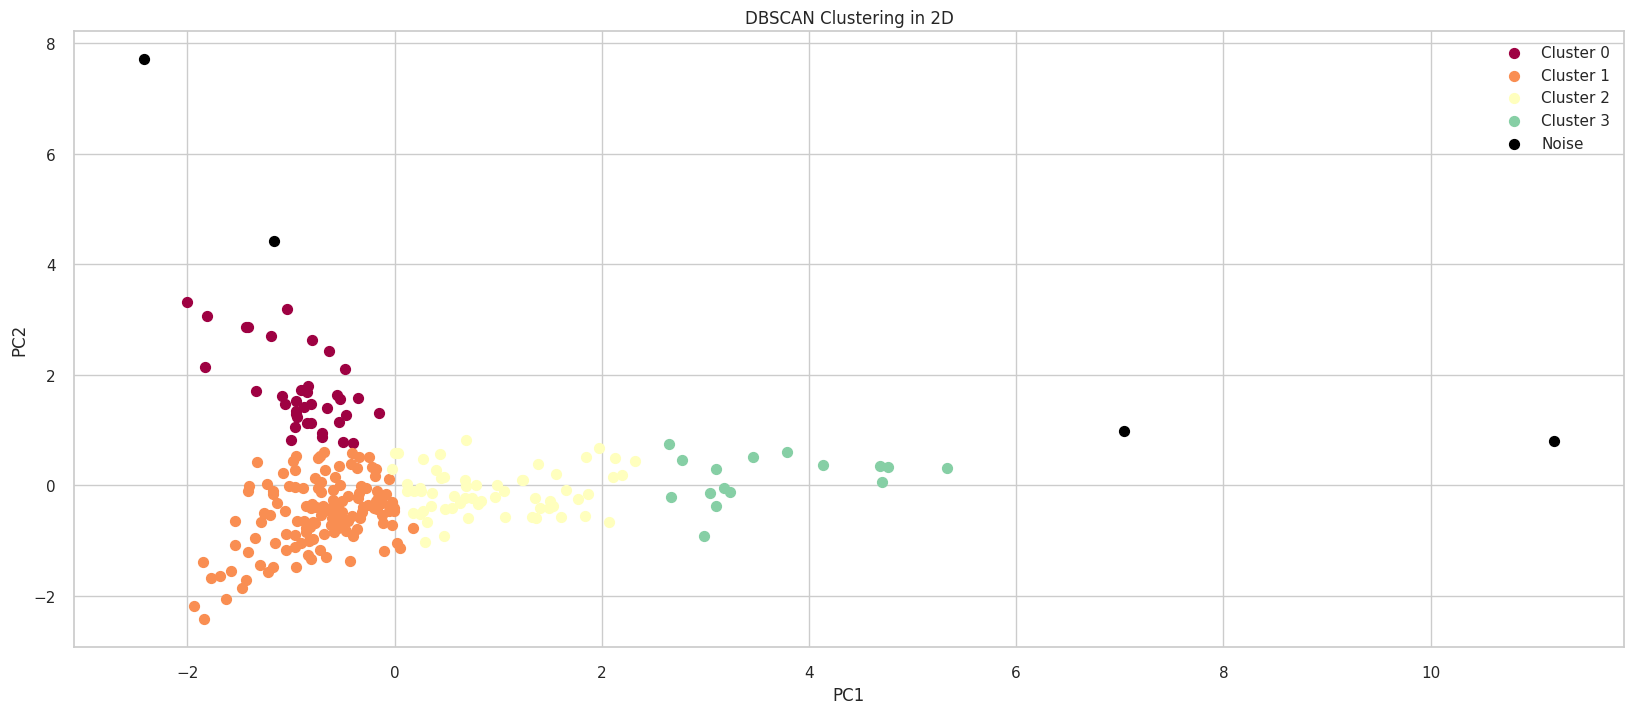

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import ConvexHull, QhullError
from kneed import KneeLocator

# Asumsikan df_pca sudah ada dan merupakan DataFrame yang sudah di PCA
# df_2d adalah hasil dari PCA dengan dua komponen utama

# Menentukan eps menggunakan k-distance graph
min_samples = 5

neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_2d.to_numpy())
distances, indices = neighbors_fit.kneighbors(df_2d)

# Sort the distances (of the k-th nearest neighbor)
distances = np.sort(distances[:, min_samples - 1])

# Menggunakan algoritma Kneedle untuk menemukan eps optimal
kneedle = KneeLocator(range(len(distances)), distances, S=1.0, curve='convex', direction='increasing')
optimal_eps = distances[kneedle.elbow]

# Menerapkan DBSCAN dengan nilai eps optimal
db = DBSCAN(eps=optimal_eps, min_samples=min_samples).fit(df_2d)
labels_dbscan_2d = db.labels_

df_pca['DBSCAN_Cluster_2D'] = labels_dbscan_2d
df['DBSCAN_Cluster_2D'] = labels_dbscan_2d

# Jumlah cluster dan noise
n_clusters = len(set(labels_dbscan_2d)) - (1 if -1 in labels_dbscan_2d else 0)
n_noise = list(labels_dbscan_2d).count(-1)

print('Estimated number of clusters: %d' % n_clusters)
print('Estimated number of noise points: %d' % n_noise)
print('Estimated number of epsilon: ', optimal_eps.round(2))

# Visualisasikan cluster dengan convex hulls
plt.figure(figsize=(20, 8))

unique_labels = set(labels_dbscan_2d)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels_dbscan_2d == k)
    xy = df_2d[class_member_mask].to_numpy()

    plt.scatter(xy[:, 0], xy[:, 1], s=50, color=tuple(col), label=f'Cluster {k}' if k != -1 else 'Noise')

    if k != -1 and len(xy) > 2:  # Pastikan ada cukup titik untuk membuat convex hull
        try:
            # Draw convex hull for each cluster
            hull = ConvexHull(xy)
            for simplex in hull.simplices:
                plt.plot(xy[simplex, 0], xy[simplex, 1], color=tuple(col))
        except QhullError as e:
            pass

plt.title('DBSCAN Clustering in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


Berdasarkan visualisasi DBSCAN Clustering 2D di atas antara PC1 dan PC2, didapatkan 4 klaster serta beberapa titik noise. Klaster 0 memiliki nilai PC1 dan PC2 yang bervariasi dengan konsentrasi utama pada nilai PC1 negatif dan nilai PC2 berkisar antara negatif hingga positif sedang. Hal ini mengindikasikan bahwa hotel-hotel dalam klaster ini cenderung memiliki harga yang terjangkau, rating yang beragam, jumlah reviewer yang sedang, dan fasilitas yang memadai.

Klaster 1 terpusat pada nilai PC1 rendah hingga positif dan nilai PC2 negatif hingga sedikit positif, menunjukkan bahwa hotel-hotel dalam klaster ini memiliki harga yang lebih tinggi, rating yang baik, dan fasilitas yang lebih lengkap dibandingkan dengan klaster lain.

Klaster 2 memiliki nilai PC1 positif dan nilai PC2 yang sangat rendah hingga sedikit positif, mengindikasikan bahwa hotel-hotel dalam klaster ini memiliki harga yang lebih terjangkau, rating yang lebih rendah, jumlah reviewer yang lebih sedikit, dan fasilitas yang lebih dasar.

Klaster 3 memiliki nilai PC1 yang positif dengan rentang nilai PC2 yang rendah, mengindikasikan bahwa hotel-hotel dalam klaster ini cenderung memiliki kombinasi harga, rating, jumlah reviewer, dan fasilitas yang beragam namun tetap memiliki kesamaan tertentu yang membedakan mereka dari klaster lainnya.

Selain itu, terdapat beberapa titik noise yang tidak termasuk dalam klaster manapun, yang kemungkinan merupakan hotel-hotel dengan karakteristik yang sangat berbeda atau data yang tidak konsisten. Dengan demikian, analisis clustering ini memberikan wawasan yang jelas mengenai segmentasi hotel-hotel di Pulau Bali berdasarkan harga, rating, jumlah reviewer, dan fasilitas.


### Interpretasi DSBSCAN Clustering

In [ ]:
df['DBSCAN_Cluster_2D'].value_counts()

DBSCAN_Cluster_2D
 1    137
 2     61
 0     37
 3     16
-1      4
Name: count, dtype: int64

In [ ]:
df_dbscan = df.copy()
df_dbscan = df_dbscan[['harga', 'reviews', 'rating', 'total_facilities', 'DBSCAN_Cluster_2D']]

n_cluster = 4
for cluster in range(n_cluster):
    cluster_data_dbscan = df_dbscan[df_dbscan['DBSCAN_Cluster_2D'] == cluster]
    print(f"Cluster {cluster + 1}:")
    print(cluster_data_dbscan.describe().round(2))

Cluster 1:
            harga  reviews  rating  total_facilities  DBSCAN_Cluster_2D
count       37.00    37.00   37.00             37.00               37.0
mean    612447.62  2856.76    8.56              4.68                0.0
std     227922.07   937.35    0.19              1.63                0.0
min     251317.00  1500.00    8.00              1.00                0.0
25%     448636.00  2100.00    8.40              4.00                0.0
50%     604215.00  2700.00    8.60              5.00                0.0
75%     734194.00  3100.00    8.70              6.00                0.0
max    1140496.00  5300.00    9.00              6.00                0.0
Cluster 2:
            harga  reviews  rating  total_facilities  DBSCAN_Cluster_2D
count      137.00   137.00  137.00            137.00              137.0
mean    513285.24   558.69    8.32              3.54                1.0
std     318508.54   496.28    0.35              1.82                0.0
min      66116.00     7.00    7.10        

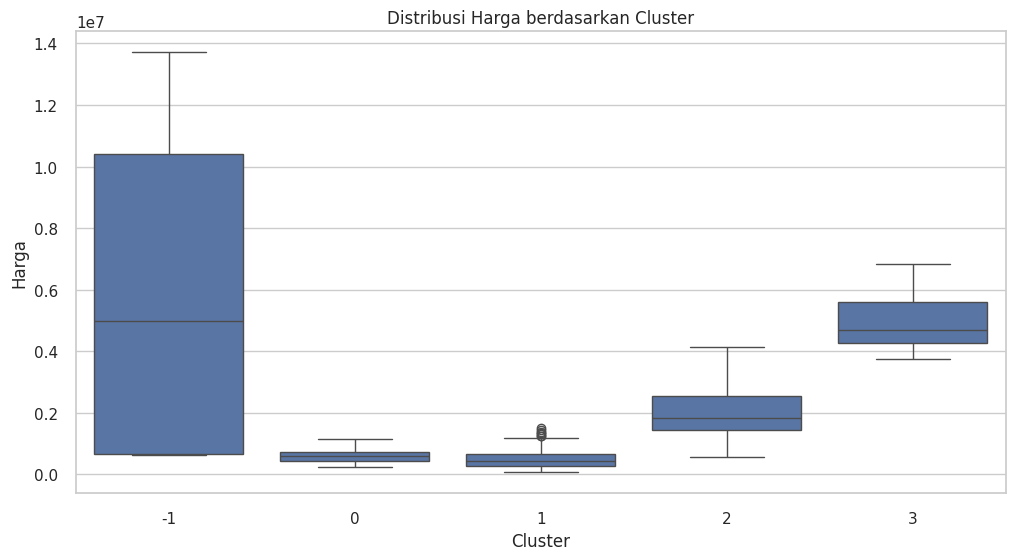

In [ ]:
sns.set(style="whitegrid")

# Plot untuk melihat distribusi harga berdasarkan cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='DBSCAN_Cluster_2D', y='harga', data=df_dbscan)
plt.title('Distribusi Harga berdasarkan Cluster')
plt.xlabel('Cluster')
plt.ylabel('Harga')
plt.show()